# Starting off

### Importing and Splitting

In [1]:
#importing all the necessary code
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Importing the files
train_data = pd.read_csv('train.csv')

In [3]:
target_y = train_data['Survived'] # Target Variable
features_x = train_data.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])

In [4]:
from sklearn.model_selection import train_test_split

data_x, X_test, data_y, y_test = train_test_split(
    features_x, target_y, test_size=0.2, random_state=42, stratify=target_y
)

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Looking at Null values within the dataset

In [7]:
#cheching for null values
data_x.isnull().sum()

Pclass        0
Sex           0
Age         137
SibSp         0
Parch         0
Fare          0
Cabin       552
Embarked      2
dtype: int64

In [8]:
# note only three columns have missing values : Age, Cabin, Embarked
# if we look at the missing values from Embarked, 

data_x[data_x['Embarked'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
829,1,female,62.0,0,0,80.0,B28,NaN
61,1,female,38.0,0,0,80.0,B28,NaN


In [9]:
# Looking at the Null values from Cabin, 
data_x.loc[data_x['Cabin'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
692,3,male,NaN,0,0,56.4958,NaN,S
481,2,male,NaN,0,0,0.0000,NaN,S
855,3,female,18.0,0,1,9.3500,NaN,S
801,2,female,31.0,1,1,26.2500,NaN,S
652,3,male,21.0,0,0,8.4333,NaN,S
...,...,...,...,...,...,...,...,...
476,2,male,34.0,1,0,21.0000,NaN,S
359,3,female,NaN,0,0,7.8792,NaN,Q
258,1,female,35.0,0,0,512.3292,NaN,C
736,3,female,48.0,1,3,34.3750,NaN,S


In [10]:
data_x.loc[ data_x['Age'].isna() ]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
692,3,male,NaN,0,0,56.4958,NaN,S
481,2,male,NaN,0,0,0.0000,NaN,S
527,1,male,NaN,0,0,221.7792,C95,S
557,1,male,NaN,0,0,227.5250,NaN,C
828,3,male,NaN,0,0,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...
277,2,male,NaN,0,0,0.0000,NaN,S
451,3,male,NaN,1,0,19.9667,NaN,S
680,3,female,NaN,0,0,8.1375,NaN,Q
359,3,female,NaN,0,0,7.8792,NaN,Q


After looking at the missing values, I believe the best course of action to fix it is as follows :
- For Age, we can use Imputer with median value
- For Embarked, we fill the most common value
- For Cabin, I will droping the null values and extracting the cabin number. 

# Visualizing the Data Set

Lets look at some graphs of the dataset and better understand the relation of the attributes here

<Axes: >

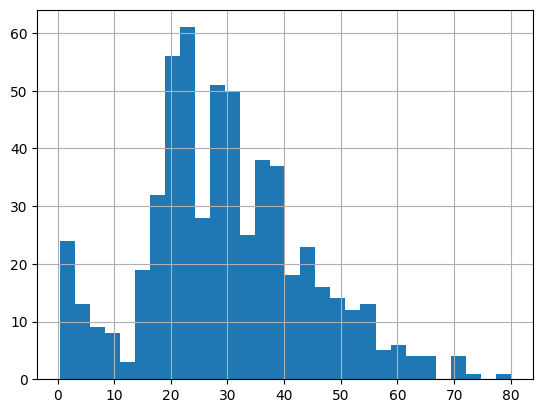

In [11]:
data_x['Age'].hist(bins=30)

<Axes: >

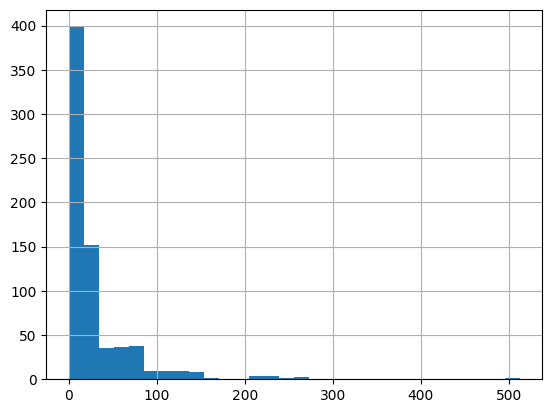

In [12]:
data_x['Fare'].hist(bins=30)

From here we can notice that : 
- The age column is fairly balanced. Thus we can leave it as is. 
- But the Fare column is highly skewed. Although using a log transfromation would be ideal, I am using random forests. They tend to handle skewed data well. But, as a cautionary step, I will make sure to remove any outliers. 

<Axes: >

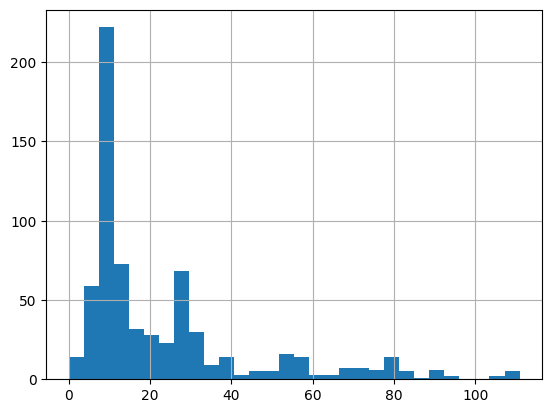

In [13]:
upper_limit = data_x['Fare'].quantile(0.95)
col = data_x.loc[data_x['Fare'] < upper_limit]
col['Fare'].hist(bins=30)

Lets look at the correlation and understand the attributes better

In [14]:
data_x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [15]:
data_x.insert(0, 'Survived', data_y)


In [16]:
correlation_table = data_x.drop(columns=['Sex','Cabin','Embarked'])
correlation_table.corr()['Survived'].abs().sort_values(ascending=False)

Survived    1.000000
Pclass      0.348007
Fare        0.275499
Age         0.084268
Parch       0.084178
SibSp       0.026115
Name: Survived, dtype: float64

In [17]:
data_x.drop(columns=['Survived'], inplace=True)

# Data Pipeline

Once again lets look at the data.

In [18]:
data_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
692,3,male,NaN,0,0,56.4958,NaN,S
481,2,male,NaN,0,0,0.0000,NaN,S
527,1,male,NaN,0,0,221.7792,C95,S
855,3,female,18.0,0,1,9.3500,NaN,S
801,2,female,31.0,1,1,26.2500,NaN,S


Now lets create the pipeline to create the data. Here, we want to make the following changes : 
- One hot encoder to vectorize Columns Sex and Embarked
- A custom encoder to encode the column deck
- Use Imputer to fill any missing values. 

We want to incorporate all of this into a full pipeline. 

In [19]:
num_cols = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']
cat_cols = ['Sex', 'Embarked']
deck_cols = ['Cabin']

In [20]:
# This is the custom encoder to covert the values for the deck column.
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class DeckEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, mapping=None):
        # Your desired mapping; 'U' means unknown/missing and maps to 0
        if mapping is None:
            mapping = {'A':4, 'B':4, 'C':4, 'D':3, 'E':3, 'F':2, 'G':2, 'T':1, 'U':0}
        self.mapping = mapping
        self._unknown_value = mapping.get('U', 0)

    def fit(self, X, y=None):
        return self  # stateless

    def transform(self, X):
        # X may arrive as a 2D array; flatten to 1D
        s = pd.Series(np.asarray(X).ravel(), dtype="string")

        # Extract the first alphabetic character as the deck letter
        # (robust to values like "C123 C125"; yields NaN if none found)
        letters = s.str.extract(r'([A-Za-z])', expand=False)

        # Replace missing/none with 'U' for unknown
        letters = letters.fillna('U')

        # Map letters to scores; anything unmapped → 'U' score
        out = letters.map(self.mapping).fillna(self._unknown_value)

        # Return 2D array as sklearn expects
        return out.to_numpy().reshape(-1, 1)

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

numpipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median'))
    ]
)

catpipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

deckpipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='U')),
        ('deckenc', DeckEncoder(
            mapping={'A':4,'B':4,'C':4,'D':3,'E':3,'F':2,'G':2,'T':1,'U':0}
        ))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numpipeline, num_cols),
        ('cat', catpipeline, cat_cols),
        ('dec', deckpipeline, deck_cols)
    ], remainder='drop'
)

full_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(random_state=42, max_depth=7))
    ]
)

full_pipeline.fit(data_x, data_y)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [22]:
import gc
from sklearn.pipeline import Pipeline
from sklearn.utils.validation import check_is_fitted

for obj in gc.get_objects():
    try:
        if isinstance(obj, Pipeline):
            name = None
            for k,v in globals().items():
                if v is obj:
                    name = k; break
            try:
                check_is_fitted(obj)
                status = "fitted"
            except Exception:
                status = "NOT fitted"
            print(f"Pipeline {name or '(unreferenced)'} -> {status} (id={id(obj)})")
    except Exception:
        pass

Pipeline catpipeline -> NOT fitted (id=5030114736)
Pipeline deckpipeline -> NOT fitted (id=5041086112)
Pipeline _ -> fitted (id=5041084768)
Pipeline obj -> NOT fitted (id=5041088320)
Pipeline obj -> fitted (id=5041087504)
Pipeline obj -> fitted (id=5041086976)


# Evaluating the Model